## COFFEE PRICES

### Creating a data frame that shows coffee prices from APIs ( https://rapidapi.com/apised-apised-default/api/commodities-apised/playground/apiendpoint_840153c6-2433-44db-b849-31d7a406f67c ) in EUR currency from 2024-07-24 to 2024-09-06.

Each API call only extracts the day and coffee prices for on date. Hash symbols (#) have been added before code execution to prevent system overload during runtime and have also been placed before DataFrame saving operations to avoid unintended DataFrame modifications. The resulting DataFrame, containing coffee price data from 2024-07-24 to 2024-09-06, has been saved in the file df_commodity_coffee_priceEUR.csv which stores all the extracted coffee prices in EUR currency.

In [96]:
import http.client
import json
import pandas as pd
import time

In [103]:
def fetch_commodity_data(dates, base="EUR", symbols="COFFEE"):
    """
    Fetch commodity data for multiple dates and return as a DataFrame
    
    Returns:
    pandas.DataFrame: Combined data for all dates
    """

    all_data = []
    
    conn = http.client.HTTPSConnection("commodity-rates-api.p.rapidapi.com")
    headers = {
        'x-rapidapi-key': "ee6cdd8a4dmsh63a9d7133a022c3p182506jsn54b9ce17f4d9",
        'x-rapidapi-host': "commodity-rates-api.p.rapidapi.com"
    }
    
    for date in dates:
        try:
            # Construct the endpoint
            endpoint = f"/open-high-low-close/{date}?base={base}&symbols={symbols}"
            conn.request("GET", endpoint, headers=headers)
            response = conn.getresponse()
            data = response.read()
            json_data = json.loads(data.decode('utf-8'))
            
            # Extract the relevant data
            if json_data.get('success') and 'rates' in json_data:
                row_data = {
                    'date': json_data['date'],
                    'timestamp': json_data['timestamp'],
                    'base': json_data['base'],
                    'symbol': json_data['symbol'],
                    'unit': json_data['unit'],
                    'open': json_data['rates']['open'],
                    'high': json_data['rates']['high'],
                    'low': json_data['rates']['low'],
                    'close': json_data['rates']['close']
                }
                all_data.append(row_data)
            
            # Add a small delay to avoid hitting rate limits
            time.sleep(1)
            
        except Exception as e:
            print(f"Error fetching data for date {date}: {str(e)}")
            continue
    
    conn.close()
    
    
    if all_data:
        df = pd.DataFrame(all_data)
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date')
        
        cols = ['date', 'timestamp', 'base', 'symbol', 'unit', 'open', 'high', 'low', 'close']
        df = df[cols]
        
        return df
    else:
        return pd.DataFrame()





#dates = ["2024-07-24", "2024-07-25", "2024-07-26", "2024-07-27", "2024-07-28", "2024-07-29", "2024-07-30", "2024-07-31", "2024-08-01", "2024-08-02", "2024-08-03", "2024-08-04", "2024-08-05", "2024-08-06", "2024-08-07", "2024-08-08", "2024-08-09", "2024-08-10", "2024-08-11", "2024-08-12", "2024-08-13", "2024-08-14", "2024-08-15", "2024-08-16", "2024-08-17", "2024-08-18", "2024-08-19", "2024-08-20", "2024-08-21", "2024-08-22", "2024-08-23", "2024-08-24", "2024-08-25", "2024-08-26", "2024-08-27", "2024-08-28", "2024-08-29", "2024-08-30", "2024-08-31", "2024-09-01", "2024-09-02", "2024-09-03", "2024-09-04", "2024-09-05", "2024-09-06"]

#df = fetch_commodity_data(dates)

#print(df.head())

In [104]:
#df

""


In [ ]:
#df.to_csv("./df_commodity_coffee_priceEUR.csv", index=False)

In [105]:
df_coffee = pd.read_csv('./df_commodity_coffee_priceEUR.csv')


In [106]:
#display first rows of the data set 
df_coffee.head()

,date,timestamp,base,symbol,unit,open,high,low,close
0,2024-07-24,1729677587,EUR,COFFEE,per lb,0.454196,0.470508,0.453205,0.469834
1,2024-07-25,1729677589,EUR,COFFEE,per lb,0.469838,0.474012,0.462741,0.466423
2,2024-07-26,1729677591,EUR,COFFEE,per lb,0.466422,0.471881,0.466048,0.471255
3,2024-07-27,1729677592,EUR,COFFEE,per lb,0.471255,0.471330,0.470784,0.471330
4,2024-07-28,1729677598,EUR,COFFEE,per lb,0.471330,0.471377,0.470651,0.470728


In [107]:
#check if there are NaNs
df_coffee.isnull().sum()

date         0
timestamp    0
base         0
symbol       0
unit         0
open         0
high         0
low          0
close        0
dtype: int64

In [108]:
#display the types in each column
df_coffee.dtypes

date          object
timestamp      int64
base          object
symbol        object
unit          object
open         float64
high         float64
low          float64
close        float64
dtype: object

In [109]:
#change the date from object to date type
df_coffee['date'] = pd.to_datetime(df_coffee['date'])

#verify
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       45 non-null     datetime64[ns]
 1   timestamp  45 non-null     int64         
 2   base       45 non-null     object        
 3   symbol     45 non-null     object        
 4   unit       45 non-null     object        
 5   open       45 non-null     float64       
 6   high       45 non-null     float64       
 7   low        45 non-null     float64       
 8   close      45 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 3.3+ KB


In [110]:
#chech if there are any duplicates
df_coffee.duplicated().sum()

np.int64(0)

#### Basic statistics on closing prices


In [111]:
mean_coffee = df_coffee['close'].mean()
mean_coffee

np.float64(0.45595360691678494)

In [112]:
median_coffee = df_coffee['close'].median()
median_coffee

np.float64(0.4515449004469727)

In [113]:
min_coffee = df_coffee['close'].min()
min_coffee

np.float64(0.4294730746960022)

In [114]:
max_coffee = df_coffee['close'].max()
max_coffee

np.float64(0.4813767032967043)

In [116]:
# price distribution analisys 
quantile_df_coffee = df_coffee['close'].quantile([0.25, 0.5, 0.75, 0.90])
quantile_df_coffee

0.25    0.446052
0.50    0.451545
0.75    0.469834
0.90    0.474082
Name: close, dtype: float64

#### Daily market volatility

In [117]:

df_coffee['daily_range'] = df_coffee['high'] - df_coffee['low']

Average_range_coffee = df_coffee['daily_range'].mean()
max_range_coffee = df_coffee['daily_range'].max()

In [118]:
Average_range_coffee

np.float64(0.011190433991273473)

In [119]:
max_range_coffee

np.float64(0.047250952604789453)

#### Analyze Overall Trend

In [120]:
first_price = df_coffee['close'].iloc[0]
last_price = df_coffee['close'].iloc[-1]
total_return = ((last_price - first_price) / first_price) * 100
total_return

np.float64(-1.6109002994715689)

### PLOTS

In [121]:
!pip install seaborn
!pip install plotly
!pip install -U kaleido
!pip install plotly

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [123]:
df_coffee.head()

,date,timestamp,base,symbol,unit,open,high,low,close,daily_range
0,2024-07-24,1729677587,EUR,COFFEE,per lb,0.454196,0.470508,0.453205,0.469834,0.017303
1,2024-07-25,1729677589,EUR,COFFEE,per lb,0.469838,0.474012,0.462741,0.466423,0.011271
2,2024-07-26,1729677591,EUR,COFFEE,per lb,0.466422,0.471881,0.466048,0.471255,0.005833
3,2024-07-27,1729677592,EUR,COFFEE,per lb,0.471255,0.471330,0.470784,0.471330,0.000546
4,2024-07-28,1729677598,EUR,COFFEE,per lb,0.471330,0.471377,0.470651,0.470728,0.000726


## For coffee trading, the closing price is generally the most relevant because:

**It's the most commonly used price for contracts
It reflects all events of the day
It serves as the reference price for the next day
It's more stable and less subject to temporary volatility**

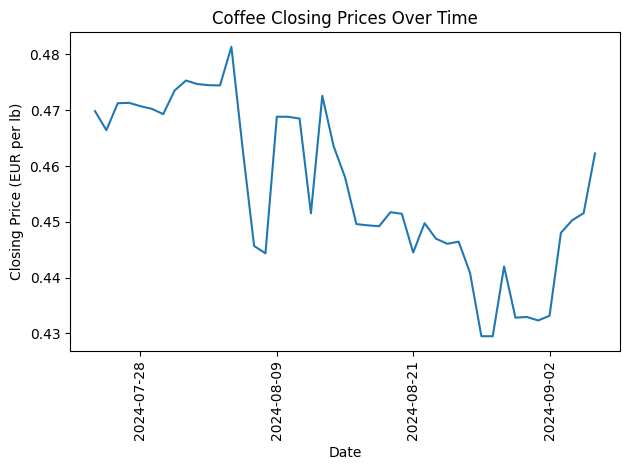

In [124]:

sns.lineplot(data=df_coffee, 
           x='date', 
           y='close')

plt.xticks(rotation=90)

plt.xlabel('Date')
plt.ylabel('Closing Price (EUR per lb)')

plt.title('Coffee Closing Prices Over Time') 


plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(12))

plt.tight_layout()

# Showing the plot
plt.show()

#### Interactive Line Plot

In [125]:
import plotly.express as px
import plotly.io as pio

In [126]:
initial_price = df_coffee['close'].iloc[0]
df_coffee['cumulative_return_2'] = (df_coffee['close'] - initial_price) / initial_price
df_coffee['cumulative_return_2_'] = df_coffee['cumulative_return_2'] * 100
#

color_map = {
   'Cumulative Return': 'brown'
}

fig = px.line(
   df_returns,
   x='date',
   y='Return',
   color='Return Type',
   title="Coffee Cumulative Return Analysis",
   labels={
       'date': 'Date',
       'Return': 'Cumulative Return (%)',
       'Return Type': 'Type of Return'
   },
   color_discrete_map=color_map
)

fig.show()

With .iloc[0], we select the first value, and then, for each day, we calculate the variation relative to the initial price. After that, we multiply by 100 to get the percentage change. The cumulative return tells us how much the price of coffee has changed in percentage terms compared to its initial price.